In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
seoul_traffic = pd.read_excel('./data/노선별 시간대별 교통량(평일).xlsx')
seoul_traffic.head(8)

,서울도시고속도로 노선별 시간대별 교통량(평일평균),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,(단위 : 대/일)
0,시간대,내부순환로,NaN,강변북로,NaN,북부간선도로,NaN,올림픽대로,NaN,동부간선도로,NaN,분당수서로,NaN,경부고속도로,NaN,서부간선도로,NaN,강남순환로,NaN
1,NaN,동향,서향,동향,서향,동향,서향,동향,서향,북향,남향,북향,남향,북향,남향,북향,남향,동향,서향
2,0,1296,1012,2480,2086,1070,814,1945,2790,1916,1118,988,1097,1822,2239,1356,1486,531,803
3,1,880,695,1633,1374,748,570,1308,1974,1278,745,749,684,1297,1456,869,933,309,480
4,2,634,528,1217,1002,588,440,1018,1537,907,567,576,512,1015,1102,651,668,220,322
5,3,590,536,1182,924,561,499,1124,1362,768,647,540,489,971,1113,667,636,213,268
6,4,923,1027,1985,1250,928,925,1989,1726,896,1356,756,784,1271,1950,1229,1175,414,366
7,5,2348,2793,5145,2867,2258,2300,5212,3331,1683,3877,1901,2590,3080,4598,2485,2328,1882,933


In [3]:
#강남순환로 동향
gang_nam_e = seoul_traffic.iloc[2:,17]
gang_nam_e

2      531
3      309
4      220
5      213
6      414
7     1882
8     5055
9     6480
10    5638
11    5192
12    4574
13    3914
14    3914
15    4274
16    4125
17    4095
18    4538
19    4899
20    4374
21    3556
22    2722
23    2317
24    1778
25    1029
Name: Unnamed: 17, dtype: object

In [4]:
#강남순환로 서향
gang_nam_w = seoul_traffic.iloc[2:,18]
gang_nam_w

2      803
3      480
4      322
5      268
6      366
7      933
8     2533
9     4073
10    4237
11    3880
12    3594
13    3590
14    3618
15    3882
16    4128
17    4521
18    5492
19    6594
20    6290
21    5261
22    3805
23    3168
24    2757
25    1604
Name: (단위 : 대/일), dtype: object

In [8]:
#강남순환로 동향,서향 통행량 차이
gang_nam= seoul_traffic.iloc[2:,17:19]
gang_nam = gang_nam.diff(axis=1)
gang_nam = gang_nam.abs()
gang_nam_diff = gang_nam.iloc[:,1]
gang_nam_diff = gang_nam_diff.values

In [9]:
#강남순환로 통행량 평균
gang_nam = seoul_traffic.iloc[2:,17:19]
gang_nam_mean = gang_nam.mean(axis=1)
gang_nam_mean = gang_nam_mean.values

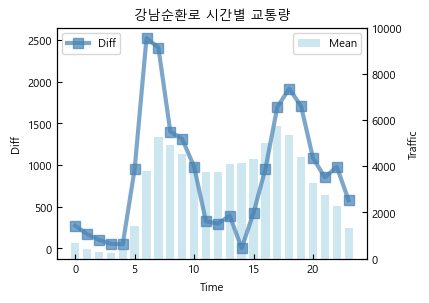

In [26]:
#시각화하기
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 2. 데이터 준비
x = np.arange(24)
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()
plt.title('강남순환로 시간별 교통량')
ax1.plot(x, gang_nam_diff, '-s', color='steelblue', markersize=7, linewidth=3, alpha=0.7, label='Diff')
ax1.set_xlabel('Time')
ax1.set_ylabel('Diff')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, gang_nam_mean, color='lightblue', label='Mean', alpha=0.6, width=0.7)
ax2.set_ylabel('Traffic')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(0, 10000)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()